In [1]:
import pandas as pd
#loading the train and test sets
titanicdataframe=pd.read_csv("titanic_train_set.csv")
final_eval_set=pd.read_csv("titanic_test_set.csv")

In [2]:
#Understanding the data from train set
print(titanicdataframe.columns)
print(titanicdataframe.head(5))
titanicdataframe.info()
titanicdataframe.describe()

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
target_attrib=["Survived"]
num_attrib=["PassengerId","Pclass","SibSp","Fare","Parch","Age"] 
text_attrib=["Name","Sex","Ticket","Cabin","Embarked"]
cat_attrib=["Pclass"]#,"Sex","Embarked"]
nonnum_cat_attrib=["Sex","Embarked"]
rel_num_attrib=["Age","SibSp","Fare","Parch"]
rel_attrib=["Pclass","Sex","Embarked","Age","SibSp","Fare","Parch"]

** Attributes Being Considered For Target Estimation **
* We are ignoring Name,PassengerId,Ticket and Cabin
* Name is being ignored because people are named independent of this event and from the data given it seems highly unlikely that any name is favoured or ignored during rescue(From Problem Description).
* PassengerId is being ignored because there is no correlation between the Pclass and it seems to be given on FCFS basis.
* Ticket seems to be a random number generated and nothing to do with the target attribute
* Cabin may have provided good information but since about 75% of data is missing the same is being dropped.
* The rest of attributes are being considered

In [4]:
corr_matrix=titanicdataframe.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(titanicdataframe,titanicdataframe["Survived"]):
    train_set=titanicdataframe.loc[train_index]
    test_set=titanicdataframe.loc[test_index]

In [6]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,444.405899,0.383427,2.308989,29.807687,0.492978,0.390449,31.819826
std,257.465527,0.486563,0.833563,14.485211,1.060720,0.838134,48.059104
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,439.500000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,667.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


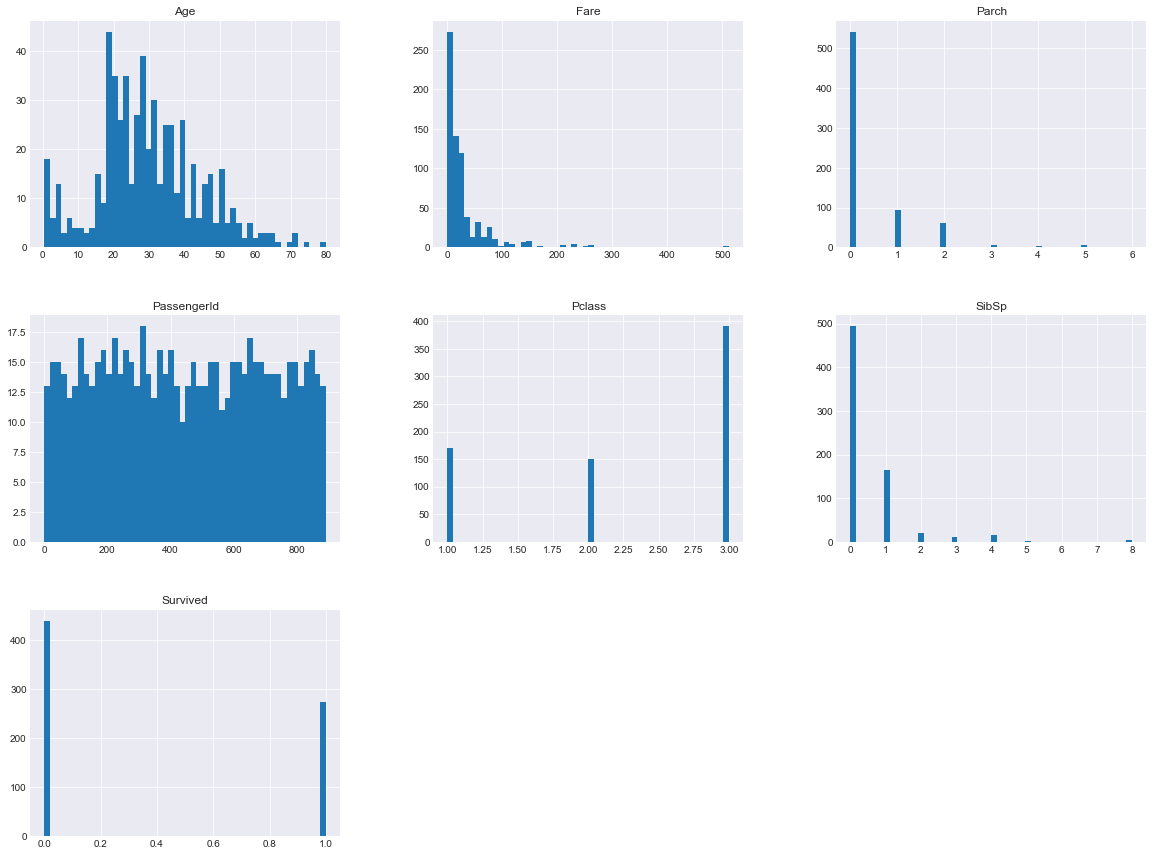

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
train_set.hist(bins=50,figsize=(20,15))
plt.show()

In [8]:
corr_matrix=train_set.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.275499
Parch          0.084178
PassengerId    0.011892
SibSp         -0.026115
Age           -0.084268
Pclass        -0.348007
Name: Survived, dtype: float64

** The scatter plots for Classifier attribute does not make sense just check the correlation matrix **

In [9]:
titanic=train_set.drop(["Survived"],axis=1)
titanic_labels=train_set["Survived"].copy()

In [10]:
from sklearn.base import BaseEstimator,TransformerMixin
class DataframeSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names,retain=False):
        self.attribute_names=attribute_names
        self.retain=retain
    def fit(self,a=None):
        return self
    def transform(self,dataframe):
        if(self.retain):
            return dataframe[self.attribute_names]
        else:
            return dataframe[self.attribute_names].values

In [11]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import LabelEncoder
class MultiColLabelEncoder(BaseEstimator,TransformerMixin):
    def __init__(self):
        pass
    def fit(self,y=None):
        return self
    def transform(self,X):
        for attr in list(X):
            X[attr]=LabelEncoder().fit_transform(X[attr])
        return X.values

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import CategoricalEncoder
from sklearn.preprocessing import LabelEncoder

num_pipeline=Pipeline([("selector",DataframeSelector(rel_num_attrib)),
                                ("imputer",Imputer(strategy="median")),
                               ("scaler",StandardScaler()),
                               ])
cat_pipeline=Pipeline([("selector",DataframeSelector(cat_attrib)),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",CategoricalEncoder(encoding="onehot-dense"))])

nonum_cat_pipeline=Pipeline([("selector",DataframeSelector(nonnum_cat_attrib,retain=True)),
                       ("multicolencoder",MultiColLabelEncoder()),
                       ("imputer",Imputer(strategy="most_frequent")),
                        ("encoder",CategoricalEncoder(encoding="onehot-dense"))])

full_pipeline=FeatureUnion(transformer_list=[("num_pipeline",num_pipeline),
                                             ("cat_pipeline",cat_pipeline),
                                              ("nonum_cat_pipeline",nonum_cat_pipeline)])

In [13]:
import numpy as np
titanic_prepared=titanic.copy()
titanic_prepared=full_pipeline.fit_transform(titanic_prepared)
print(titanic_prepared)

[[-0.08113533 -0.46508428  0.5138115  ...,  0.          0.          1.        ]
 [-0.08113533 -0.46508428 -0.66256323 ...,  0.          0.          1.        ]
 [-0.08113533 -0.46508428  3.95539858 ...,  0.          0.          1.        ]
 ..., 
 [ 1.41700669  0.47833454  0.0532047  ...,  0.          0.          1.        ]
 [ 1.34017889 -0.46508428  0.13909685 ...,  0.          0.          1.        ]
 [-0.08113533 -0.46508428 -0.10973011 ...,  0.          0.          1.        ]]


/Users/adithyabandi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [14]:
#Machine learning Models libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#Scoring and Validating Model
from sklearn.model_selection import cross_val_score

#Initializing ML models
sgd_clf=SGDClassifier(random_state=42)
rf_clf=RandomForestClassifier(random_state=42)
gb_clf=GradientBoostingClassifier(random_state=42)
knn_clf=KNeighborsClassifier()
sv_clf=SVC()
lsv_clf=LinearSVC()

#Validating ML Models
print("Stochastic gradient classifier results:")
cross_val_results=cross_val_score(sgd_clf,titanic_prepared,titanic_labels,cv=5,scoring="accuracy")
print(cross_val_results)
print(np.mean(cross_val_results)*100)
print(np.std(cross_val_results)*100)

print("\n Random Forest classifier results:")
cross_val_results=cross_val_score(rf_clf,titanic_prepared,titanic_labels,cv=5,scoring="accuracy")
print(cross_val_results)
print(np.mean(cross_val_results)*100)
print(np.std(cross_val_results)*100)

print("\n Gradient classifier results:")
cross_val_results=cross_val_score(gb_clf,titanic_prepared,titanic_labels,cv=5,scoring="accuracy")
print(cross_val_results)
print(np.mean(cross_val_results)*100)
print(np.std(cross_val_results)*100)


print("\n K Neighbors classifier results:")
cross_val_results=cross_val_score(knn_clf,titanic_prepared,titanic_labels,cv=5,scoring="accuracy")
print(cross_val_results)
print(np.mean(cross_val_results)*100)
print(np.std(cross_val_results)*100)


print("\n Support Vector Machine classifier results:")
cross_val_results=cross_val_score(sv_clf,titanic_prepared,titanic_labels,cv=5,scoring="accuracy")
print(cross_val_results)
print(np.mean(cross_val_results)*100)
print(np.std(cross_val_results)*100)


print("\n Linear Support Vector classifier results:")
cross_val_results=cross_val_score(lsv_clf,titanic_prepared,titanic_labels,cv=5,scoring="accuracy")
print(cross_val_results)
print(np.mean(cross_val_results)*100)
print(np.std(cross_val_results)*100)

Stochastic gradient classifier results:
[ 0.63636364  0.67132867  0.74125874  0.75352113  0.46808511]
65.4111456419
10.2658806077

 Random Forest classifier results:
[ 0.79020979  0.74125874  0.81118881  0.85211268  0.80141844]
79.9237691686
3.57390838977

 Gradient classifier results:


/Users/adithyabandi/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:131: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[ 0.76223776  0.77622378  0.86713287  0.83802817  0.84397163]
81.7518841163
4.08490251496

 K Neighbors classifier results:
[ 0.77622378  0.7972028   0.85314685  0.8028169   0.80851064]
80.7580193256
2.5261790945

 Support Vector Machine classifier results:
[ 0.7972028   0.81118881  0.83916084  0.82394366  0.82978723]
82.0256668713
1.46662898294

 Linear Support Vector classifier results:
[ 0.7972028   0.74825175  0.8041958   0.81690141  0.80851064]
79.501247928
2.4236428914


In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
param_grid={'C': expon(scale=100), 'gamma': expon(scale=.1),
  'kernel': ["linear","poly", "rbf","sigmoid"]}
rnd_search=RandomizedSearchCV(sv_clf,param_grid,cv=5,scoring="accuracy",n_iter=20)
rnd_search.fit(titanic_prepared,titanic_labels)

/Users/adithyabandi/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:714: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=1,
          param_distributions={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1c527610>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1c527110>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [23]:
rnd_results=rnd_search.cv_results_
print(np.max(rnd_results["mean_test_score"]))
print(np.min(rnd_results["mean_test_score"]))
print(np.std(rnd_results["mean_test_score"]))
#for score,param in zip(rnd_results["mean_test_score"],rnd_results["params"]):
    #print(score,param)

0.832865168539
0.623595505618
0.0611712932364


In [28]:
print(rnd_search.best_estimator_)

SVC(C=29.417040552163016, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.031039818253828129,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [22]:
from sklearn.metrics import accuracy_score

test_set_prepared=full_pipeline.transform(test_set)
test_actuals=test_set["Survived"].copy()
test_results=rnd_search.best_estimator_.predict(test_set_prepared)
print(accuracy_score(test_actuals,test_results))

0.810055865922


/Users/adithyabandi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [21]:
passengerIds=final_eval_set["PassengerId"]
eval_set_prepared=full_pipeline.transform(final_eval_set)
final_results=rnd_search.best_estimator_.predict(eval_set_prepared)
passengerArray=passengerIds.values

with open('titanic_result.csv', 'w') as the_file:
    the_file.write("PassengerId,Survived\n")
    for i in range(passengerArray.shape[0]):
        the_file.write("{0},{1}\n".format(passengerArray[i],final_results[i]))
    #print("{0},{1}".format(passengerArray[i],final_results[i]))

/Users/adithyabandi/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
